# **Rio de Janeiro AirBNB dataset**


The main goal of this notebook is to develop an Exploratory Data Analysis applied on Rio de Janeiro AirBNB Dataset.

**Which database is been used?**

- Rio de Janeiro AirBnb Dataset (http://insideairbnb.com/get-the-data.html)

The database has three main tables: 

- **listings**: is the main database in which you have the information of the houses for rent within airbnb (many information are available in this dataset such as price of the day, reviews, cleaning note etc ...).

- **calendar**:  is the database with the house price calendar! Imagine that when we rent a house through AirBnb we can see how much it costs to rent the house on a certain day!

- **reviews**: is the database with the comments of the reviews (In this EDA we will not use this base)

Author: Jaime Kiyoshi Kuei

## 1. Pre-Analysis

Intalling and importing all important libraries 

### 1.1 Installing and Importing

In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scipy
!pip install geopandas

     |████████████████████████████████| 1.0MB 5.8MB/s 
     |████████████████████████████████| 6.5MB 31.6MB/s 
     |████████████████████████████████| 14.8MB 288kB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

### 1.2 Extracting tables

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
root = '/content/drive/My Drive/datasets'

#Dados do AirBNB - Calendar, Listings, Reviews
calendar = pd.read_csv(f"{root}/calendar.csv.gz", compression = 'gzip')
listings = pd.read_csv(f"{root}/listings.csv.gz", compression = 'gzip')
reviews = pd.read_csv(f"{root}/reviews.csv.gz", compression = 'gzip')

## Part I: Exploratory Data Analysis

For this part we will focus on development in exploratory data analysis!

### 2.1 Understanding the data

In [5]:
# Verifying Columns
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [6]:
# Let's take a look on the dataframe?
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210222161029,2021-02-23,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96592,-43.17896,Entire condominium,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Air conditioning"", ""Essentials"", ""Luggage dr...",$221.00,5,180,5.0,5.0,1125.0,1125.0,5.0,1125.0,NaN,t,0,8,38,304,2021-02-23,260,12,2,2010-07-15,2021-02-08,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,t,1,1,0,0,2.01
1,24480,https://www.airbnb.com/rooms/24480,20210222161029,2021-02-23,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\r\nI am a filmmaker and a tea...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98570,-43.20193,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Air conditioni...",$307.00,3,90,3.0,3.0,90.0,90.0,3.0,90.0,NaN,t,0,0,0,10,2021-02-23,85,0,0,2010-09-26,2018-02-14,95.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,f,1,1,0,0,0.67


In [7]:
#Understanding descriptive statistics for numeric values
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.661500e+04,2.661500e+04,2.661500e+04,26591.000000,26591.000000,0.0,26615.000000,26615.000000,26615.000000,0.0,24869.000000,26363.000000,26615.000000,2.661500e+04,26531.000000,26531.000000,2.653100e+04,2.653100e+04,26531.000000,2.653100e+04,0.0,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,16118.000000,16104.000000,16107.000000,16106.000000,16110.000000,16106.000000,16108.000000,0.0,26615.000000,26615.000000,26615.000000,26615.000000,16657.000000
mean,2.526448e+07,2.021022e+13,1.006657e+08,9.367568,9.367568,NaN,-22.965837,-43.248533,4.161112,NaN,1.707909,2.548230,4.725268,3.819109e+04,4.660510,5.032038,3.842962e+04,3.843929e+04,4.788828,3.843440e+04,NaN,19.245200,41.221379,64.233440,219.438174,12.146308,2.341725,0.296487,94.571349,9.636612,9.392376,9.799888,9.758535,9.759717,9.296374,NaN,9.665414,8.259177,1.295022,0.087620,0.629190
std,1.573416e+07,4.175860e+00,1.090670e+08,93.121768,93.121768,NaN,0.034971,0.096296,2.494174,NaN,1.054267,2.127716,19.102522,6.129662e+06,18.908336,19.572665,6.139357e+06,6.139357e+06,19.222567,6.139357e+06,NaN,12.455029,23.794758,34.644936,141.525405,29.722813,5.707102,0.882080,9.740887,0.940490,1.138224,0.767390,0.829072,0.749132,1.053340,NaN,35.942124,31.611146,5.300625,0.622397,0.876064
min,1.787800e+04,2.021022e+13,3.607000e+03,0.000000,0.000000,NaN,-23.072920,-43.704790,0.000000,NaN,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.220219e+07,2.021022e+13,1.431500e+07,1.000000,1.000000,NaN,-22.984570,-43.304090,2.000000,NaN,1.000000,1.000000,1.000000,3.000000e+01,1.000000,2.000000,9.000000e+01,9.000000e+01,1.600000,9.000000e+01,NaN,3.000000,23.000000,43.000000,88.000000,0.000000,0.000000,0.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.090000
50%,2.374090e+07,2.021022e+13,6.026326e+07,1.000000,1.000000,NaN,-22.971700,-43.196210,4.000000,NaN,1.000000,2.000000,2.000000,1.000000e+03,2.000000,3.000000,1.125000e+03,1.125000e+03,2.200000,1.125000e+03,NaN,27.000000,56.000000,86.000000,254.000000,2.000000,0.000000,0.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.270000
75%,4.089613e+07,2.021022e+13,1.546962e+08,4.000000,4.000000,NaN,-22.951575,-43.186300,5.000000,NaN,2.000000,3.000000,4.000000,1.125000e+03,4.000000,4.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,30.000000,59.000000,89.000000,363.000000,9.000000,2.000000,0.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.000000,1.000000,0.000000,0.850000
max,4.827600e+07,2.021022e+13,3.892463e+08,7218.000000,7218.000000,NaN,-22.749820,-43.104860,16.000000,NaN,30.000000,50.000000,1000.000000,1.000000e+09,1000.000000,1000.000000,1.000000e+09,1.000000e+09,1000.000000,1.000000e+09,NaN,30.000000,60.000000,90.000000,365.000000,446.000000,118.000000,36.000000,100.000000,1

In [9]:
#Analyzing null values
for column, proportion in (listings.isnull().sum() * 100 / len(listings)).items():
  print(f"Column {column}: {proportion}%")

Column id: 0.0%
Column listing_url: 0.0%
Column scrape_id: 0.0%
Column last_scraped: 0.0%
Column name: 0.10896111215479992%
Column description: 5.466842006387376%
Column neighborhood_overview: 46.21829795228255%
Column picture_url: 0.0%
Column host_id: 0.0%
Column host_url: 0.0%
Column host_name: 0.09017471350742062%
Column host_since: 0.09017471350742062%
Column host_location: 0.40202893105391696%
Column host_about: 51.549877888408794%
Column host_response_time: 30.11835431147849%
Column host_response_rate: 30.11835431147849%
Column host_acceptance_rate: 35.84820589892917%
Column host_is_superhost: 0.09017471350742062%
Column host_thumbnail_url: 0.09017471350742062%
Column host_picture_url: 0.09017471350742062%
Column host_neighbourhood: 42.348299830922414%
Column host_listings_count: 0.09017471350742062%
Column host_total_listings_count: 0.09017471350742062%
Column host_verifications: 0.0%
Column host_has_profile_pic: 0.09017471350742062%
Column host_identity_verified: 0.090174713507

In [10]:
# Selecting just the main columns that we'll use on the EDA
# 'id', 'host_response_time', 'host_response_rate', 'host_is_superhost', 
# 'review_scores_rating', 'price', 'room_type'

listings_analysis = listings[['id', 'host_response_time', 'host_acceptance_rate', 'host_is_superhost', 'latitude', 'longitude',
                              'review_scores_rating', 'price', 'room_type', 'accommodates', 'bedrooms', 'minimum_nights', 'number_of_reviews']]
listings_analysis.head(3)

,id,host_response_time,host_acceptance_rate,host_is_superhost,latitude,longitude,review_scores_rating,price,room_type,accommodates,bedrooms,minimum_nights,number_of_reviews
0,17878,within an hour,100%,t,-22.96592,-43.17896,94.0,$221.00,Entire home/apt,5,2.0,5,260
1,24480,within a few hours,NaN,f,-22.98570,-43.20193,95.0,$307.00,Entire home/apt,2,1.0,3,85
2,25026,within a few hours,78%,f,-22.97712,-43.19045,94.0,$160.00,Entire home/apt,2,1.0,7,238


In [11]:
listings_analysis.describe()

,id,latitude,longitude,review_scores_rating,accommodates,bedrooms,minimum_nights,number_of_reviews
count,2.661500e+04,26615.000000,26615.000000,16118.000000,26615.000000,24869.000000,26615.000000,26615.000000
mean,2.526448e+07,-22.965837,-43.248533,94.571349,4.161112,1.707909,4.725268,12.146308
std,1.573416e+07,0.034971,0.096296,9.740887,2.494174,1.054267,19.102522,29.722813
min,1.787800e+04,-23.072920,-43.704790,20.000000,0.000000,1.000000,1.000000,0.000000
25%,1.220219e+07,-22.984570,-43.304090,93.000000,2.000000,1.000000,1.000000,0.000000
50%,2.374090e+07,-22.971700,-43.196210,98.000000,4.000000,1.000000,2.000000,2.000000
75%,4.089613e+07,-22.951575,-43.186300,100.000000,5.000000,2.000000,4.000000,9.000000
max,4.827600e+07,-22.749820,-43.104860,100.000000,16.000000,30.000000,1000.000000,446.000000


**Why only these six columns appear?**

The describe () method brings descriptive statistics information only from numerical data !!

We can use dtypes to identify the types of variables we have in our data!

In [12]:
# Print dos tipos de variáveis do nosso dataframe
listings_analysis.dtypes

id                        int64
host_response_time       object
host_acceptance_rate     object
host_is_superhost        object
latitude                float64
longitude               float64
review_scores_rating    float64
price                    object
room_type                object
accommodates              int64
bedrooms                float64
minimum_nights            int64
number_of_reviews         int64
dtype: object

we have three types of variables within our dataframe:

1. int64: are the whole numbers
2. float64: are rational numbers (those that have a comma and can be positive or negative)
3. object: are those that are considered strings (a string!)

Article: https://pbpython.com/pandas_dtypes.html

### 2.2 Creating business questions to be answered

This is a crucial step for us to do data exploration if we want to guide data exploration!

Some ideas that we will work on:

1. How are rental prices distributed in the city of Rio de Janeiro?
2. Is there a price difference in the different types of accommodation?
3. By type of accommodation, do superhost's have better ratings than non-superhost's?

#### 2.2.1 [Univariate Analysis] How are rental prices distributed in the city of Rio de Janeiro?

Are we going to analyze the price variable and understand how these prices are distributed across the city? What will be our most common price range for the city? :)

In [13]:
# Dataframe print
listings_analysis.head(3)

,id,host_response_time,host_acceptance_rate,host_is_superhost,latitude,longitude,review_scores_rating,price,room_type,accommodates,bedrooms,minimum_nights,number_of_reviews
0,17878,within an hour,100%,t,-22.96592,-43.17896,94.0,$221.00,Entire home/apt,5,2.0,5,260
1,24480,within a few hours,NaN,f,-22.98570,-43.20193,95.0,$307.00,Entire home/apt,2,1.0,3,85
2,25026,within a few hours,78%,f,-22.97712,-43.19045,94.0,$160.00,Entire home/apt,2,1.0,7,238


Shall we use a graph to analyze the distribution?

We'll use a histogram graph to look at how the distribution is!

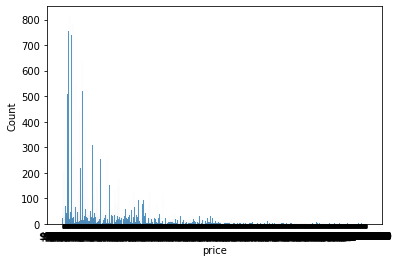

In [14]:
# Plotting histogram of the value price
sns.histplot(listings_analysis['price']);

We have several classes in this case? For each single price value, a value has been created on the x-axis! That's why we have all this mess!

But how can we extract the price value (string) as a number?

We will use the re (Regular expression opeerations) library that works with identification and extraction of string information, let's see!

re documentation: https://docs.python.org/3/library/re.html

In [15]:
# Extracting the number value of price
listings_analysis.loc[:, 'price_numeric'] = listings_analysis['price']

# Removing special char '$'
listings_analysis.loc[:, 'price_numeric'] = listings_analysis['price_numeric'].apply(lambda x: re.sub(r"\$", "", x))

# Removing ',' 
listings_analysis.loc[:, 'price_numeric'] = listings_analysis['price_numeric'].apply(lambda x: re.sub(r",", "", x))

# Transforming in numeric value
listings_analysis.loc[:, 'price_numeric'] = pd.to_numeric(listings_analysis['price_numeric'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [16]:
# Verifying type column
listings_analysis['price_numeric'].dtypes

dtype('float64')

In [17]:
listings_analysis[['price', 'price_numeric']].head(10)

,price,price_numeric
0,$221.00,221.0
1,$307.00,307.0
2,$160.00,160.0
3,$273.00,273.0
4,$135.00,135.0
5,$484.00,484.0
6,"$1,751.00",1751.0
7,$540.00,540.0
8,$160.00,160.0
9,$782.00,782.0


After all this transformation, we are going to plot our histogram with the numerical value of price!

Let's see how it looks!

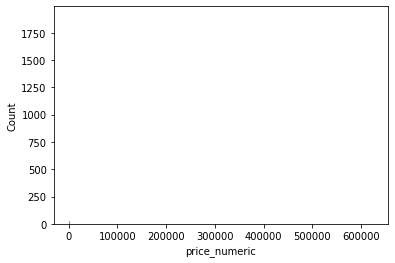

In [18]:
# Plotando histograma com a variável price com valor em numérico
sns.histplot(listings_analysis['price_numeric']);

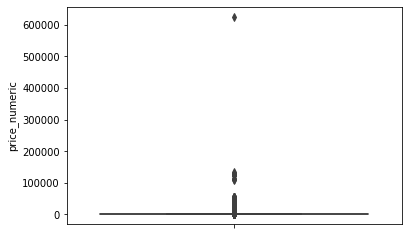

In [19]:
# Plotando boxplot com a variável price com valor em numérico
sns.boxplot(y=listings_analysis['price_numeric']);

**Why can't we see the data in the plots if they are already numeric?**

It's the outliers! There are some outliers that are affecting our distribution and therefore we are not being able to see our plot as we wanted!

Let's remove the outliers to see our chart better!

In [20]:
## APPROACH REMOVING OUTLIERS THROUGH THE WHISKERS OF THE BOXPLOT: KNOWN AS IQR INTERQUARTILE DISTANCE
## Artigo: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
prices = listings_analysis['price_numeric']
Q1 = listings_analysis['price_numeric'].quantile(0.25)
Q3 = listings_analysis['price_numeric'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

if lower_whisker < listings_analysis['price_numeric'].describe()['min']:
  lower_whisker = listings_analysis['price_numeric'].describe()['min']
elif upper_whisker > listings_analysis['price_numeric'].describe()['max']:
  upper_whisker = listings_analysis['price_numeric'].describe()['max']

print("Nosso valor do whisker mínimo e whisker máximo: ")
lower_whisker, upper_whisker

Nosso valor do whisker mínimo e whisker máximo: 


(0.0, 1139.5)

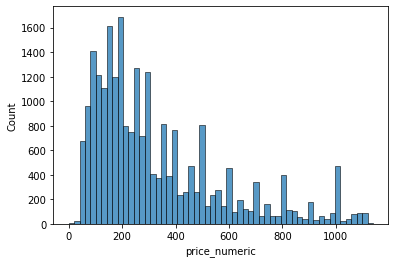

In [21]:
# Plotting price without outliers
sns.histplot(listings_analysis['price_numeric'], binrange=(lower_whisker, upper_whisker));

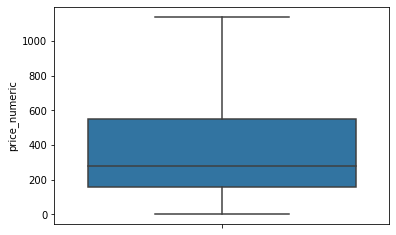

In [22]:
# Plotting BoxPlot without outliers
sns.boxplot(y=listings_analysis['price_numeric'], showfliers=False);

Now, how do you plot the graphs side by side instead of cell by cell?

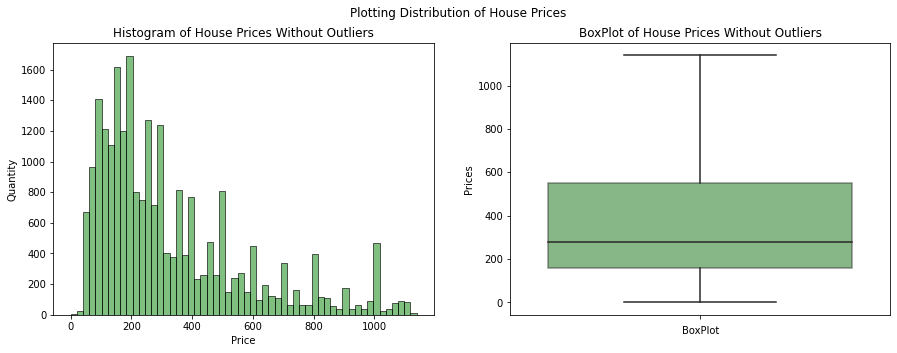

In [23]:
# Plotando Subplots
# Referencia 1: (https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html)
# Referência 2: (https://stackoverflow.com/questions/20174468/how-to-create-subplots-of-pictures-made-with-the-hist-function-in-matplotlib-p)

fig, axs = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Plotting Distribution of House Prices')

#Plotting Subplots
sns.histplot(listings_analysis['price_numeric'], binrange=(lower_whisker, upper_whisker), ax=axs[0], color='g', alpha=0.5);
sns.boxplot(y=listings_analysis['price_numeric'], showfliers=False, ax=axs[1], color='g', boxprops=dict(alpha=0.5));

#Labeling Titles
axs[0].set_title('Histogram of House Prices Without Outliers');
axs[1].set_title('BoxPlot of House Prices Without Outliers');

#Labeling Histogram
axs[0].set_xlabel('Price');
axs[0].set_ylabel('Quantity');

#Labeling BoxPlot
axs[1].set_xlabel('BoxPlot');
axs[1].set_ylabel('Prices');

Let's analyze the describe() of the variable?

In [24]:
listings_analysis['price_numeric'].describe()

count     26615.000000
mean        742.589254
std        5368.868834
min           0.000000
25%         157.000000
50%         280.000000
75%         550.000000
max      625216.000000
Name: price_numeric, dtype: float64

**How are rental prices distributed in the city of Rio de Janeiro?**

As we can see:
- at least 50% of houses rent prices are less than 280,00
- at least 75% of houses rent prices are less than 550,00 
- the mean value of houses rent prices are $742! It's an indicative that we can have outliers that are "forcing" the mean value to be greater. 

If we'll travel to the Rio de Janeiro City we can know better if the price is very high or not! (Of course it's a simple analysis and doesn't take considerations about the type of houses even the regions!)



#### 2.2.2 [Bivariate Analysis] Is there a price difference in the different types of accommodation?

Now let's explore in the same way as the previous question but looking at the differences between the types of accommodation!

[Text(0, 0.5, 'Preço'), Text(0.5, 0, 'Acomodação')]

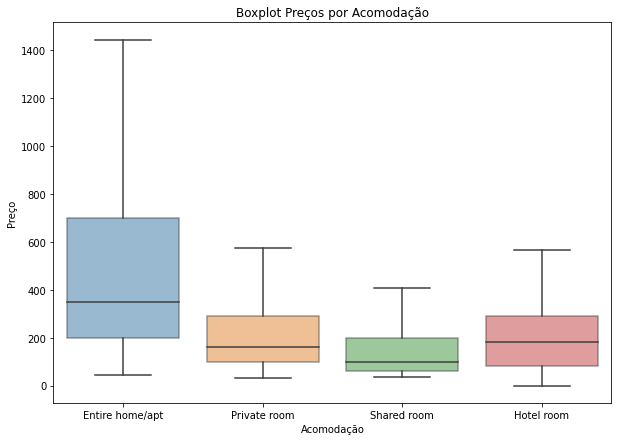

In [25]:
# Plotting prices by Room Type
plt.figure(figsize=(10, 7));
plt.title("Boxplot Preços por Acomodação");

ax = sns.boxplot(y=listings_analysis['price_numeric'], 
            x=listings_analysis['room_type'], 
            showfliers=False, 
            boxprops=dict(alpha=0.5));

ax.set(xlabel="Acomodação", ylabel="Preço")

Plotting the distribution!

[Text(0, 0.5, 'Frequência'), Text(0.5, 0, 'Preço')]

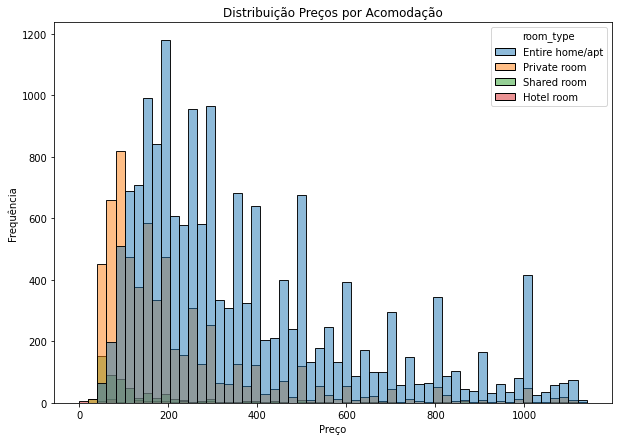

In [26]:
# Plotando histograma com a variável price com valor em numérico
plt.figure(figsize=(10, 7));
plt.title("Distribuição Preços por Acomodação");

ax = sns.histplot(listings_analysis[['room_type', 'price_numeric']], 
                  x='price_numeric', 
                  binrange=(lower_whisker, upper_whisker), 
                  hue='room_type');

ax.set(xlabel="Preço", ylabel="Frequência")

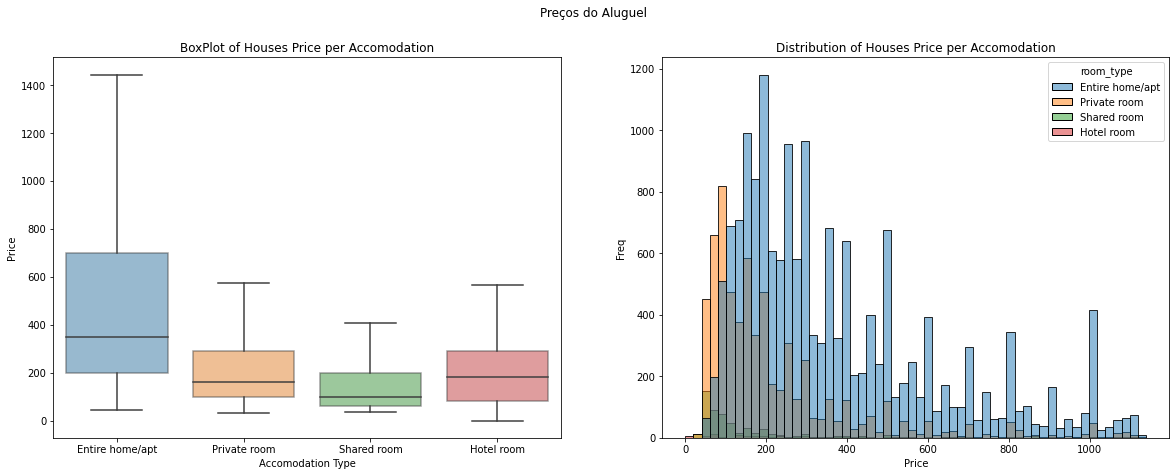

In [27]:
# Plotting subplots
# Ref 1: (https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html)
# Ref 2: (https://stackoverflow.com/questions/20174468/how-to-create-subplots-of-pictures-made-with-the-hist-function-in-matplotlib-p)

fig, axs = plt.subplots(1, 2, figsize=(20,7))
fig.suptitle('Preços do Aluguel')

#Plotting Subplots
sns.boxplot(y=listings_analysis['price_numeric'], 
                 x=listings_analysis['room_type'], 
                 showfliers=False,
                 boxprops=dict(alpha=0.5),
                 ax=axs[0]);

sns.histplot(listings_analysis[['room_type', 'price_numeric']],
             x='price_numeric',
             binrange=(lower_whisker, upper_whisker),
             hue='room_type',
             ax=axs[1]);

#Labeling Titles
axs[0].set_title('BoxPlot of Houses Price per Accomodation');
axs[1].set_title('Distribution of Houses Price per Accomodation');

#Labeling Histogram
axs[0].set_xlabel('Accomodation Type');
axs[0].set_ylabel('Price');

#Labeling BoxPlot
axs[1].set_xlabel('Price');
axs[1].set_ylabel('Freq');

Describing per type of accomodation!

In [28]:
listings_analysis.groupby('room_type')['price_numeric'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,19285.0,823.069277,3669.685038,43.0,200.0,350.0,698.0,129233.0
Hotel room,99.0,325.212121,1008.519821,0.0,80.0,183.0,290.0,9999.0
Private room,6619.0,448.315758,4094.666233,33.0,100.0,160.0,290.0,134562.0
Shared room,612.0,1456.738562,25437.765123,34.0,60.0,100.0,200.0,625216.0


**Is there a price difference in the different types of accommodation?**

As we can see for Entire home/apt:
- at least 50% of houses rent prices are less than 350,00
- at least 75% of houses rent prices are less than 698,00 
- the mean value of houses rent prices are 823,00! 

As we can see for Hotel room:
- at least 50% of houses rent prices are less than 290,00
- at least 75% of houses rent prices are less than 183,00 
- the mean value of houses rent prices are 325,00! 

As we can see for Private room:
- at least 50% of houses rent prices are less than 290,00
- at least 75% of houses rent prices are less than 160,00 
- the mean value of houses rent prices are 448,00! 

As we can see for Shared Room:
- at least 50% of houses rent prices are less than 200,00
- at least 75% of houses rent prices are less than 100,00 
- the mean value of houses rent prices are 1456,00! (Outlier!) 

If we'll travel to the Rio de Janeiro City we can know better if the price is very high or not to the types of accomodation for rent!

As we can see Private Room and Shared Room are the cheapest prices for rent, the most expensive is Entire home/apt! 

#### 2.2.3 [Multivariate Analysis] By type of accommodation, do superhost's have better ratings than non-superhost's?

For this question we will explore the columns 'host_is_superhost', 'revire_scores_rating' and 'room_type'

And we will be using a graphics package called seaborn! If you are more interested you can explore this link: https://seaborn.pydata.org/

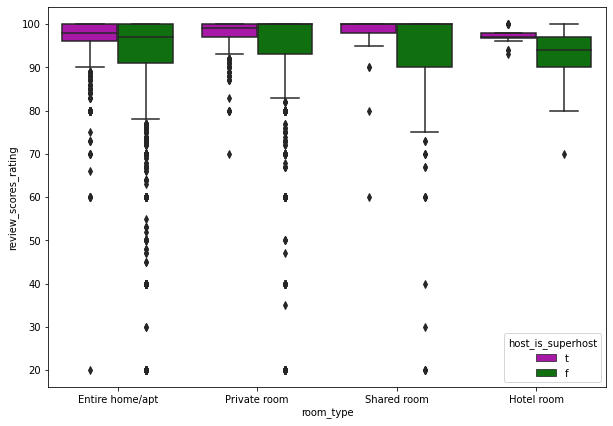

In [29]:
# Instead of using only 2 variables, let's use three variables!
# Price, Type of Accommodation and if the Host is Super or not!
plt.figure(figsize=(10, 7))
sns.boxplot(x="room_type", y="review_scores_rating", hue='host_is_superhost', 
            palette=["m", "g"], data=listings_analysis);

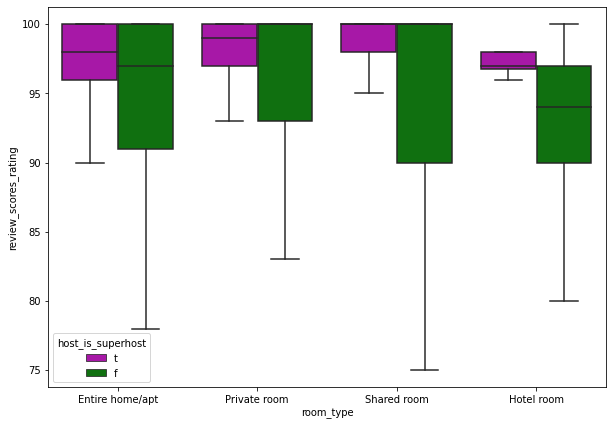

In [30]:
# Removing Outliers
plt.figure(figsize=(10, 7))
sns.boxplot(x="room_type", y="review_scores_rating", 
            hue='host_is_superhost', palette=["m", "g"], 
            data=listings_analysis, showfliers=False);

We can see that there is a tendency that superhosts usually have a higher rating than those that are not classified as superhost's!

Although we have this graphically, let's see the description of this data!

In [31]:
# Print estatística descritiva de review_scores_rating por host_is_superhost
listings_analysis.groupby('host_is_superhost')['review_scores_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
host_is_superhost,,,,,,,,
f,12081.0,93.663273,10.859641,20.0,92.0,97.0,100.0,100.0
t,4023.0,97.294308,3.995259,20.0,96.0,98.0,100.0,100.0


In [32]:
# Print estatística descritiva de review_scores_rating por room_type e host_is_superhost
listings_analysis.groupby(['room_type', 'host_is_superhost'])['review_scores_rating'].describe()

count       mean  ...    75%    max
room_type       host_is_superhost                     ...              
Entire home/apt f                  8921.0  93.504876  ...  100.0  100.0
                t                  3165.0  97.180095  ...  100.0  100.0
Hotel room      f                    49.0  92.714286  ...   97.0  100.0
                t                    24.0  97.250000  ...   98.0  100.0
Private room    f                  2890.0  94.271280  ...  100.0  100.0
                t                   795.0  97.752201  ...  100.0  100.0
Shared room     f                   221.0  92.316742  ...  100.0  100.0
                t                    39.0  97.256410  ...  100.0  100.0

[8 rows x 8 columns]

## Part II: Analyzing a time series

We will work with the dataset **calendar** and we will try to understand how future prices will vary according to the data collected by the AirBNB website!

### 3.1 Understanding the database

Let's take a quick look at how the data is doing?

In [33]:
calendar.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [34]:
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,45766287,2021-02-23,f,$150.00,$150.00,2.0,1125.0
1,45764740,2021-02-24,f,$100.00,$100.00,1.0,4.0
2,45764740,2021-02-25,t,$100.00,$100.00,1.0,4.0
3,45764740,2021-02-26,t,$100.00,$100.00,1.0,4.0
4,45764740,2021-02-27,t,$100.00,$100.00,1.0,4.0


In [35]:
# How many null values?
print(f"We have a percentage of null values ​​in the Price variable of: {calendar['price'].isna().mean()*100}%")
print(f"We have a total of null values ​​in the Price variable of: {calendar['price'].isna().sum()}")
print(f"We have a total of values ​​in the Price variable of: {calendar['price'].count()}")

We have a percentage of null values ​​in the Price variable of: 0.001827544628743085%
We have a total of null values ​​in the Price variable of: 177
We have a total of values ​​in the Price variable of: 9684949


In [36]:
#As the total of null values ​​is quite insignificant compared to the total of values ​​we have in the Price variable, we can disregard these values ​​and continue with our analysis.
calendar = calendar[calendar['price'].notna()]

In [37]:
#transforming price to numeric
calendar.loc[:, 'price_numeric'] = calendar['price'].apply(lambda x: re.sub(r'\$', '', str(x)))
calendar.loc[:, 'price_numeric'] = calendar['price_numeric'].apply(lambda x: re.sub(r',', '', str(x)))
calendar.loc[:, 'price_numeric'] = pd.to_numeric(calendar['price_numeric'])
calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_numeric
0,45766287,2021-02-23,f,$150.00,$150.00,2.0,1125.0,150.0
1,45764740,2021-02-24,f,$100.00,$100.00,1.0,4.0,100.0
2,45764740,2021-02-25,t,$100.00,$100.00,1.0,4.0,100.0


What is my date range?

In [38]:
#Data range
calendar['date'].min(), calendar['date'].max()

('2021-02-22', '2022-02-24')

In [39]:
#How many days?
len(calendar['date'].drop_duplicates())

368

Within our dataset we have 368 unique days with a range from 2021-02-22 to 2022-02-24

### 3.2 Creating our business questions!

For this part we will divide into two main questions:

1. How is the behavior of rental prices in the city of Rio de Janeiro?
2. How is the price behavior separated by types of accommodation?

#### 3.2.1 How is the behavior of rental prices in the city of Rio de Janeiro?

Let's plot a time series and identify the behaviors!

In [40]:
calendar[calendar['date']=='2021-02-23'].head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_numeric
0,45766287,2021-02-23,f,$150.00,$150.00,2.0,1125.0,150.0
366,45765451,2021-02-23,f,$200.00,$200.00,1.0,1125.0,200.0
1702,46820926,2021-02-23,f,"$3,000.00","$3,000.00",1.0,28.0,3000.0
2551,47324862,2021-02-23,f,$200.00,$200.00,2.0,1125.0,200.0
3008,47979810,2021-02-23,f,$220.00,$220.00,4.0,1125.0,220.0
3665,89454,2021-02-23,f,$450.00,$450.00,2.0,1125.0,450.0
5110,2716527,2021-02-23,f,$400.00,$400.00,2.0,1125.0,400.0
5111,2489727,2021-02-23,t,$100.00,$100.00,1.0,1125.0,100.0
6246,2771514,2021-02-23,t,$650.00,$650.00,15.0,30.0,650.0
6934,2771621,2021-02-23,f,"$1,000.00","$1,000.00",2.0,1125.0,1000.0


In [41]:
calendar.groupby(by=['date']).mean().head()

,listing_id,minimum_nights,maximum_nights,price_numeric
date,,,,
2021-02-22,4.468157e+07,7.045977,804.870690,623.604585
2021-02-23,2.529429e+07,4.948957,80986.771188,770.315595
2021-02-24,2.524338e+07,4.814588,39724.525633,722.555313
2021-02-25,2.526027e+07,4.814202,38450.719360,719.061890
2021-02-26,2.526027e+07,4.792858,38450.774681,808.895632


In [42]:
calendar.groupby(by=['date']).agg({'price_numeric': 'mean', 'maximum_nights': 'median'}).head()

,price_numeric,maximum_nights
date,,
2021-02-22,623.604585,1125.0
2021-02-23,770.315595,1125.0
2021-02-24,722.555313,1125.0
2021-02-25,719.061890,1125.0
2021-02-26,808.895632,1125.0


In [43]:
# Saving the aggregated dataframe
calendar_agg = calendar.groupby(by=['date']).agg({'price_numeric': 'mean'}).reset_index()
calendar_agg['date'] = pd.to_datetime(calendar_agg['date'])

In [44]:
calendar_agg.head()

,date,price_numeric
0,2021-02-22,623.604585
1,2021-02-23,770.315595
2,2021-02-24,722.555313
3,2021-02-25,719.061890
4,2021-02-26,808.895632


In [45]:
calendar_agg.dtypes

date             datetime64[ns]
price_numeric           float64
dtype: object

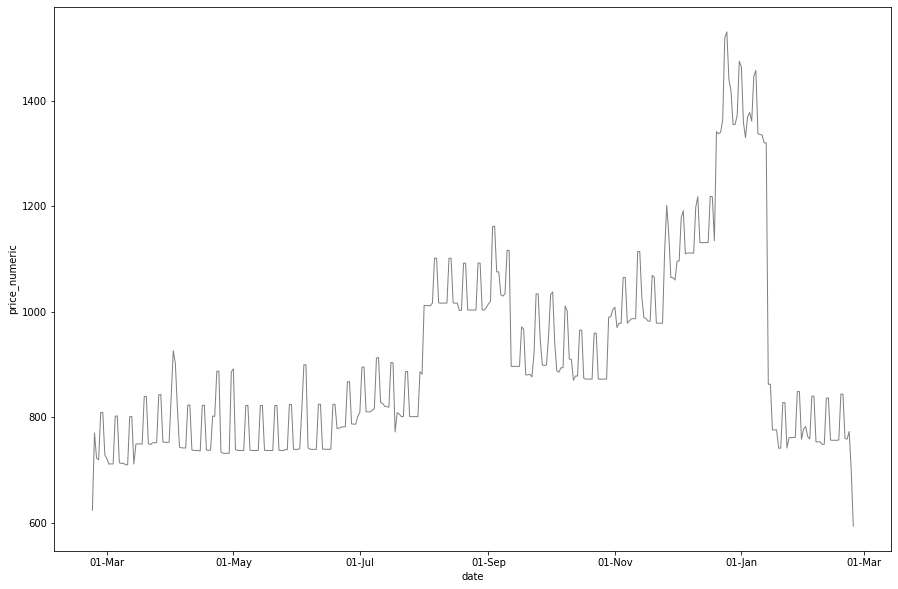

In [46]:
from matplotlib import dates
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='date', y='price_numeric', data=calendar_agg, ax=ax, color='gray', linewidth=1)
ax.xaxis.set_major_formatter(dates.DateFormatter("%d-%b"))

What can we plot for these price spikes to be normalized?

A moving average! :)

In [47]:
calendar_agg['rolling_7_days'] = calendar_agg.price_numeric.rolling(7, min_periods=1).mean()
calendar_agg.head()

,date,price_numeric,rolling_7_days
0,2021-02-22,623.604585,623.604585
1,2021-02-23,770.315595,696.960090
2,2021-02-24,722.555313,705.491831
3,2021-02-25,719.061890,708.884346
4,2021-02-26,808.895632,728.886603


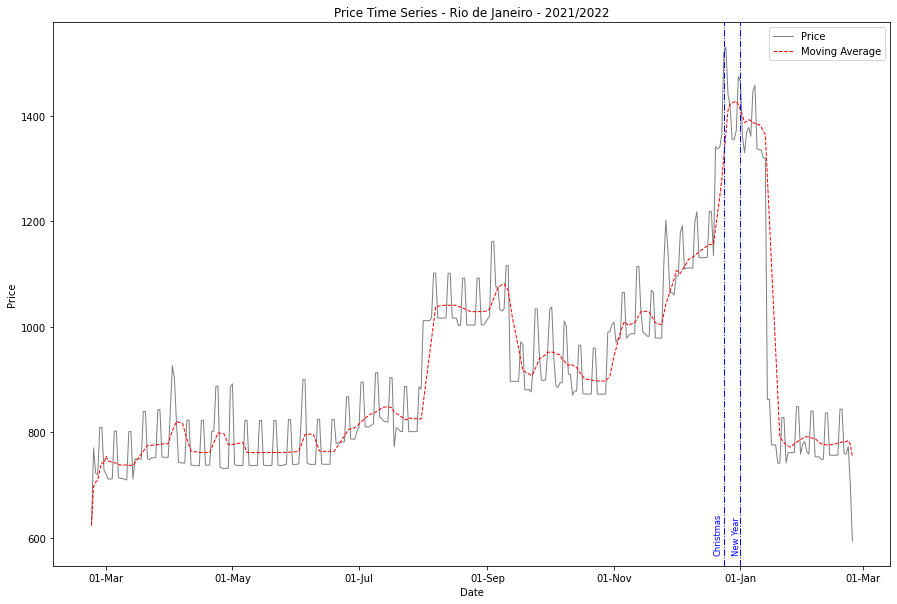

In [48]:
from matplotlib import dates
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='date', y='price_numeric', data=calendar_agg, ax=ax, color='gray', linewidth=1);
sns.lineplot(x='date', y='rolling_7_days', data=calendar_agg, ax=ax, color='red', linewidth=1, linestyle="--");
ax.xaxis.set_major_formatter(dates.DateFormatter("%d-%b"))

ax.axvline(x=pd.to_datetime('2022-01-01'), color='blue', linewidth=1, linestyle='-.');
ax.axvline(x=pd.to_datetime('2021-12-24'), color='blue', linewidth=1, linestyle='-.');
#Referência: https://matplotlib.org/stable/tutorials/text/text_props.html
ax.text(pd.to_datetime('2021-12-28'), 570,'New Year', rotation=90, color='blue', size='smaller');
ax.text(pd.to_datetime('2021-12-19'), 570, 'Christmas', rotation=90, color='blue', size='smaller');

ax.legend(["Price", "Moving Average"])
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Price Time Series - Rio de Janeiro - 2021/2022");

#### 3.2.2 How is the price behavior if separated by accommodation types?

Now let's separate the time series and see how it behaves if we plot separately for each type!

In [49]:
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_numeric
0,45766287,2021-02-23,f,$150.00,$150.00,2.0,1125.0,150.0
1,45764740,2021-02-24,f,$100.00,$100.00,1.0,4.0,100.0
2,45764740,2021-02-25,t,$100.00,$100.00,1.0,4.0,100.0
3,45764740,2021-02-26,t,$100.00,$100.00,1.0,4.0,100.0
4,45764740,2021-02-27,t,$100.00,$100.00,1.0,4.0,100.0


In [50]:
# Taking the data from listings
listings_room_type = listings[['id', 'room_type']]

calendar_join_listing = calendar.merge(listings_room_type, how='left', left_on='listing_id', right_on='id')
calendar_room_type_agg = calendar_join_listing\
                          .groupby(['date', 'room_type']).agg({'price_numeric': 'mean'})\
                          .reset_index()

calendar_room_type_agg['date'] = pd.to_datetime(calendar_room_type_agg['date'])
calendar_room_type_agg.head()

,date,room_type,price_numeric
0,2021-02-22,Entire home/apt,729.505455
1,2021-02-22,Private room,233.388889
2,2021-02-22,Shared room,110.000000
3,2021-02-23,Entire home/apt,806.988067
4,2021-02-23,Hotel room,254.620000


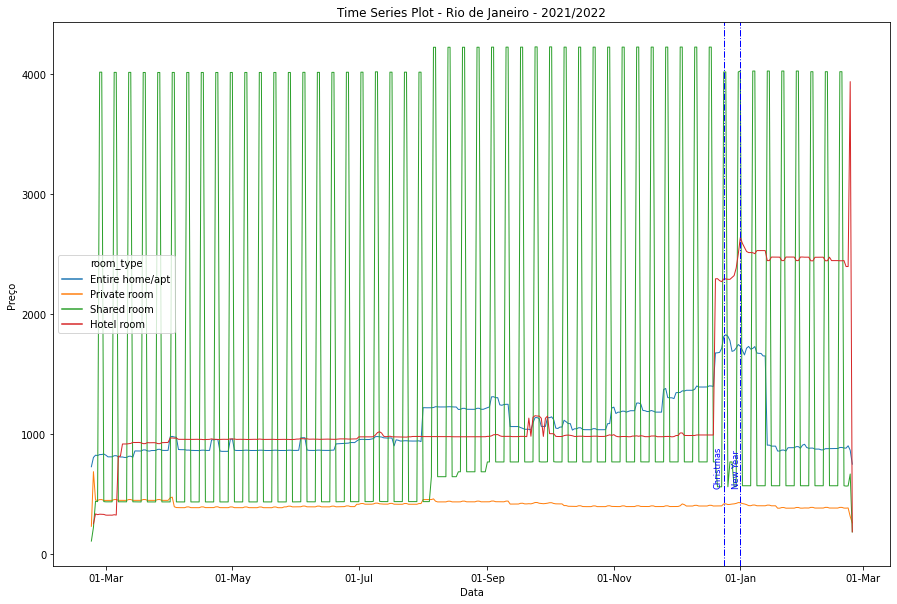

In [51]:
from matplotlib import dates
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='date', y='price_numeric', data=calendar_room_type_agg, ax=ax, hue='room_type', linewidth=1);
ax.xaxis.set_major_formatter(dates.DateFormatter("%d-%b"))

ax.axvline(x=pd.to_datetime('2022-01-01'), color='blue', linewidth=1, linestyle='-.');
ax.axvline(x=pd.to_datetime('2021-12-24'), color='blue', linewidth=1, linestyle='-.');
#Referência: https://matplotlib.org/stable/tutorials/text/text_props.html
ax.text(pd.to_datetime('2021-12-28'), 570,'New Year', rotation=90, color='blue', size='smaller');
ax.text(pd.to_datetime('2021-12-19'), 570,'Christmas', rotation=90, color='blue', size='smaller');

ax.set_xlabel("Data")
ax.set_ylabel("Preço")
ax.set_title("Time Series Plot - Rio de Janeiro - 2021/2022");

What a mess! We will try to separate the graphs and plot in 4 subplots!

In [52]:
calendar_room_type_agg.head()

,date,room_type,price_numeric
0,2021-02-22,Entire home/apt,729.505455
1,2021-02-22,Private room,233.388889
2,2021-02-22,Shared room,110.000000
3,2021-02-23,Entire home/apt,806.988067
4,2021-02-23,Hotel room,254.620000


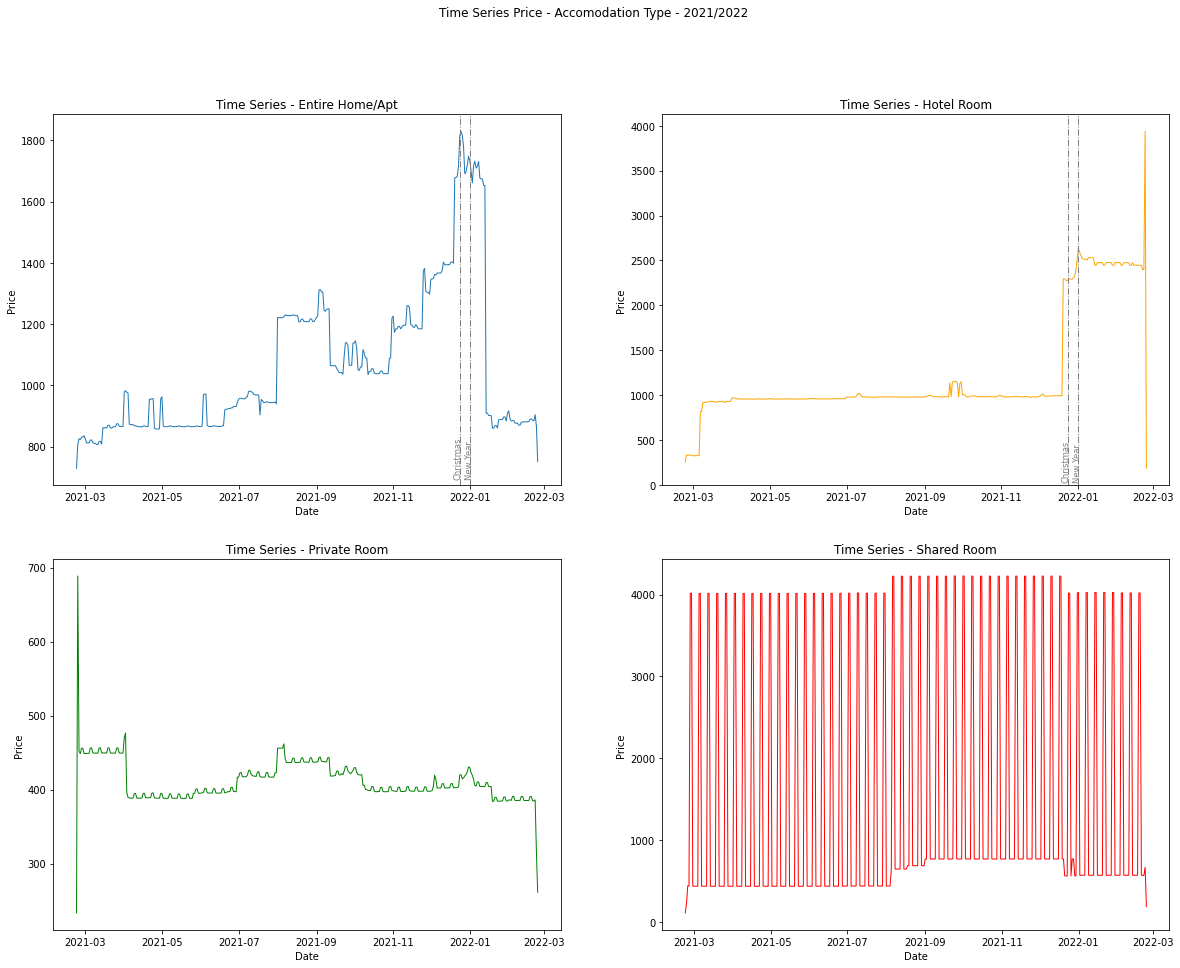

In [53]:
### PLOTTING SUBPLOTS (https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html)
### Ref: (https://stackoverflow.com/questions/20174468/how-to-create-subplots-of-pictures-made-with-the-hist-function-in-matplotlib-p)

fig, axs = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('Time Series Price - Accomodation Type - 2021/2022')

#Separating Dataset's
entire_home = calendar_room_type_agg[calendar_room_type_agg['room_type']=='Entire home/apt']
hotel_room = calendar_room_type_agg[calendar_room_type_agg['room_type']=='Hotel room']
private_room = calendar_room_type_agg[calendar_room_type_agg['room_type']=='Private room']
shared_room = calendar_room_type_agg[calendar_room_type_agg['room_type']=='Shared room']

#Labeling Titles
axs[0,0].set_title('Time Series - Entire Home/Apt')
axs[0,1].set_title('Time Series - Hotel Room')
axs[1,0].set_title('Time Series - Private Room')
axs[1,1].set_title('Time Series - Shared Room')

# #Setting X Axis
axs[0,0].set_xlabel('Date')
axs[0,1].set_xlabel('Date')
axs[1,0].set_xlabel('Date')
axs[1,1].set_xlabel('Date')

# #Setting Y Axis
axs[0,0].set_ylabel('Price')
axs[0,1].set_ylabel('Price')
axs[1,0].set_ylabel('Price')
axs[1,1].set_ylabel('Price')

#Plotando as timeseries por tipo
sns.lineplot(x='date', y='price_numeric', data=entire_home, ax=axs[0,0], linewidth=1);
sns.lineplot(x='date', y='price_numeric', data=hotel_room, ax=axs[0,1], linewidth=1, color='orange');
sns.lineplot(x='date', y='price_numeric', data=private_room, ax=axs[1,0], linewidth=1, color='green');
sns.lineplot(x='date', y='price_numeric', data=shared_room, ax=axs[1,1], linewidth=1, color='red');

# #Plotando os feriados
# ## Entire home
axs[0,0].axvline(x=pd.to_datetime('2022-01-01'), color='gray', linewidth=1, linestyle='-.');
axs[0,0].axvline(x=pd.to_datetime('2021-12-24'), color='gray', linewidth=1, linestyle='-.');
axs[0,0].text(pd.to_datetime('2021-12-28'), 700,'New Year', rotation=90, color='gray', size='smaller');
axs[0,0].text(pd.to_datetime('2021-12-19'), 700,'Christmas', rotation=90, color='gray', size='smaller');

# ## Hotel room
axs[0,1].axvline(x=pd.to_datetime('2022-01-01'), color='gray', linewidth=1, linestyle='-.');
axs[0,1].axvline(x=pd.to_datetime('2021-12-24'), color='gray', linewidth=1, linestyle='-.');
axs[0,1].text(pd.to_datetime('2021-12-28'), 50,'New Year', rotation=90, color='gray', size='smaller');
axs[0,1].text(pd.to_datetime('2021-12-19'), 50,'Christmas', rotation=90, color='gray', size='smaller');